# Project 2: The Dijkstra’s Algorithm

## Part (a): Adjacency Matrix 
Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an `array` for the priority queue. Implement the Dijkstra’s algorithm using this
setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically. 

## Sample Data


In [4]:
V_data = 5
E_data = [(0, 1, 1), (0, 2, 2), (0, 3, 4), (0, 4, 3),(1, 2, 1), (2, 3, 1), (3, 4, 1)]  # each edge is (start, end, value)

<img src = "sample.jpg">

### Priority Queue Data Structure (using array)

In [5]:
class priority_queue_array:
    def __init__(self, length: int):
        self.len = length
        self.arr = [float('infinity')] * length #default - all infinity 
        self.arr[0] = 0
        
    def getQ(self):
        return self.arr
    
    def isempty(self):
        for u in range(self.len) :
            if self.arr[u] != float('infinity') :
                return False
        return True
        
    def pop(self) -> int: #find the one with minimum key val
        min_val = float('infinity')
        position = -1 
        for u in range(self.len) :
            if self.arr[u] < min_val :
                min_val = self.arr[u]
                position = u
        self.arr[position] = float('infinity') #pop it
        return position
        
    def update(self, u, value):
        self.arr[u] = value
        

- The implementation of array for min-priority queue makes it performance worse than heap structure
- Time Complexity yields O(n)

In [6]:
def dijkstra_1(V: int, E: list):
    # Dijkstra does not work with negative weight edges: assign -1 to denote missing edge between two vertices
    adjMatrix = [[-1] * V for i in range(V)]
    for (sourceVertex, otherVertex, weight) in E:
        adjMatrix[sourceVertex][otherVertex] = weight
        adjMatrix[otherVertex][sourceVertex] = weight
    
    # Initialize array which holds total weight of a path from source vertex to every vertex
    d = [float('infinity')] * V
    d[0] = 0 #source vertex 
    s = [0] * V
    s[0] = 1
    
    pq = priority_queue_array(V)
    #print("   Path Weights \tPriorityQ")
    
    def toUpdatePathWeight(currentV: int, neighbor: int) -> bool:
        return (adjMatrix[currentV][neighbor] != -1 and d[currentV] + adjMatrix[currentV][neighbor] < d[neighbor])
    
    while not pq.isempty():
        currentV = pq.pop() # Extract vertex with minimum path weight
        s[currentV] = 1
        for neighbor in range(V):
            if s[neighbor]==0 and toUpdatePathWeight(currentV, neighbor):
                d[neighbor] = d[currentV] + adjMatrix[currentV][neighbor]
                pq.update(neighbor, d[neighbor])
        #print(f'{currentV} {d} \t{pq.getQ()}')

    return d

minPathWeights = dijkstra_1(V_data, E_data)

print()
print('Minimum Path Weights:')
for index, pathWeight in enumerate(minPathWeights):
    print(index,':',pathWeight)


Minimum Path Weights:
0 : 0
1 : 1
2 : 2
3 : 3
4 : 3


`Theoretical Time Complexity Analysis`: 
- the while loop would iterate for $V$ times
- within each iteration, it again iterate whole priority_queue_array and the edges of adjacency matrix which cost $O(V)$
- the total time complexity is $O(V^2)$

In [7]:
import pandas as pd
import numpy as np
import random
import timeit

Vs = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

time = []
sigma = []
for V in Vs:
    E = []
    for u in range(0, V - 1):
        E.append((u, u + 1, random.randint(1, 1000))) 
        #make sure all the vertices are connected - connected graph 
    for i in range(10):
        for u in range(1, V):
            E.append((random.randint(0, u - 1), u, random.randint(1, 1000000)))
            
    start_time = timeit.default_timer()
    dijkstra_1(V, E)
    end_time = timeit.default_timer()
    time.append(end_time - start_time)
    sigma.append((end_time - start_time) / (V * V))

df_V = pd.DataFrame({'V':Vs,'time':time,'V^2':np.square(Vs),'time / (V^2)':sigma})
df_V

,V,time,V^2,time / (V^2)
0,1000,0.177363,1000000,1.773626e-07
1,2000,0.722863,4000000,1.807157e-07
2,3000,1.614616,9000000,1.794017e-07
3,4000,2.769457,16000000,1.730910e-07
4,5000,4.366868,25000000,1.746747e-07
5,6000,6.211500,36000000,1.725417e-07
6,7000,8.817242,49000000,1.799437e-07
7,8000,11.270363,64000000,1.760994e-07


- Empirically, we found that the runtime divided by $V^2$ is approximately constant, thus the time complexity is positively related to square $V$.

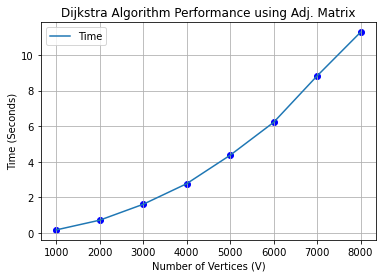

In [8]:
import matplotlib.pyplot as plt
plt.plot(df_V['V'], df_V['time'], label='Time')

plt.title('Dijkstra Algorithm Performance using Adj. Matrix')
plt.xlabel('Number of Vertices (V)')
plt.ylabel('Time (Seconds)')
plt.scatter(df_V['V'], df_V['time'],marker=r'o',color='b')

plt.legend()
plt.grid(True)
plt.show()

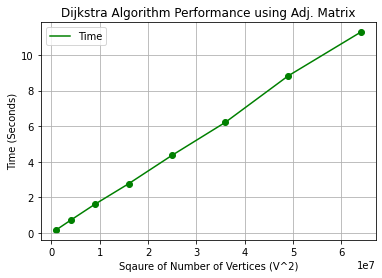

In [9]:
plt.plot(np.square(Vs), df_V['time'], label='Time', color='g')

plt.title('Dijkstra Algorithm Performance using Adj. Matrix')
plt.xlabel('Sqaure of Number of Vertices (V^2)')
plt.ylabel('Time (Seconds)')
plt.scatter(np.square(Vs), df_V['time'],marker=r'o',color='g')

plt.legend()
plt.grid(True)
plt.show()

## Part (b): Adjacency List 
Suppose the input graph G = (V, E) is stored in an array of adjacency lists and
we use a minimizing `heap` for the priority queue. Implement the Dijkstra’s
algorithm using this setting and analyze its time complexity with respect to |V|
and |E| both theoretically and empirically. 

In [21]:
import heapq as pq

def dijkstra_2(V, E):
    # store the E into adjacency list
    edge = []
    for i in range(V): 
        edge.append([])
    for (start, end, value) in E :
        edge[start].append((end, value))
        edge[end].append((start, value))
        
    #print(edge)
    # initialize the priority queue
    d = [float('inf')] * V # initialize the distance array with value of infinity
    d[0] = 0
    
    li = [(0, 0)] #(vertex, path_weight)
    pq.heapify(li) 
    
    visited = [False] * V
    while (True) :
        u = pq.heappop(li)[1] #based on path_weight
        if visited[u] == True : continue
        else : visited[u] = True
        if u == V - 1 : break #last vertex
        for (v, value) in edge[u] : #relax neighbors
            if d[v] > d[u] + value :
                d[v] = d[u] + value
                pq.heappush(li, (d[v], v))
    
dijkstra_2(V_data, E_data)    

- There are $(V + E)$ times of iteration, however each time it only cost $O(\log V)$ to find the minimum distance in the priority_queue_heap. Thus, the total time complexity is $O((V + E) \log V)$

In [36]:
import math

Vs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
time = []
sigma = []
comp = []
Es = []
EV =[]
for V in Vs:
    print(V)
    E = []
    count = 0
    for u in range(0, V - 1):
        count += 1
        E.append((u, u + 1, random.randint(1, 100)))
    for i in range(V):
        for u in range(1, V//2):
            count += 1
            E.append((random.randint(0, u - 1), u, random.randint(1, 100)))
    Es.append(count)
    start_time = timeit.default_timer()
    dijkstra_2(V, E)
    end_time = timeit.default_timer()
    time.append(end_time - start_time)
    EV.append(V+count)
    sigma.append((end_time - start_time) / ((V + count) * math.log(count, 2)))
    comp.append((V + count) * math.log(count, 2))

df_E = pd.DataFrame({'V': Vs, 'E':Es,'time':time,'(V + E) * log(V)': comp, 'time / ((V + E) * log(V))':sigma})
df_E

100
200
300
400
500
600
700
800
900
1000


,V,E,time,(V + E) * log(V),time / ((V + E) * log(V))
0,100,4999,0.004445,6.265357e+04,7.094634e-08
1,200,19999,0.008717,2.885960e+05,3.020442e-08
2,300,44999,0.021381,7.002141e+05,3.053489e-08
3,400,79999,0.035044,1.309514e+06,2.676116e-08
4,500,124999,0.055322,2.124893e+06,2.603531e-08
5,600,179999,0.105752,3.152830e+06,3.354189e-08
6,700,244999,0.134021,4.398606e+06,3.046890e-08
7,800,319999,0.151379,5.866678e+06,2.580312e-08
8,900,404999,0.290280,7.560907e+06,3.839220e-08
9,1000,499999,0.329578,9.484695e+06,3.474839e-08


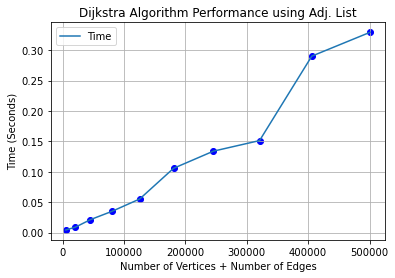

In [56]:
plt.plot(EV, df_E['time'], label='Time')

plt.title('Dijkstra Algorithm Performance using Adj. List')
plt.xlabel('Number of Vertices + Number of Edges')
plt.ylabel('Time (Seconds)')
plt.scatter(EV, df_E['time'],marker=r'o',color='b')

plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


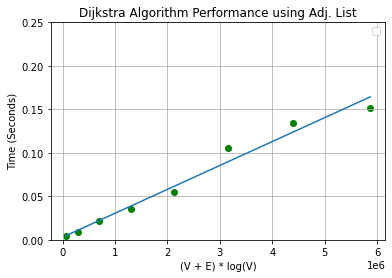

In [54]:
#plt.plot(comp[:8], time[:8], label='Time', color='g')

plt.title('Dijkstra Algorithm Performance using Adj. List')
plt.xlabel('(V + E) * log(V)')
plt.ylabel('Time (Seconds)')
plt.ylim([0, 0.25])
plt.scatter(comp[:8], time[:8],marker=r'o',color='g')

# Generating the parameters of the best fit line
m, c = np.polyfit(comp[:8], time[:8], 1)

# Plotting the straight line by using the generated parameters
plt.plot(np.array(comp[:8]), m*np.array(comp[:8])+c)

plt.legend()
plt.grid(True)
plt.show()

### (c) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances. 

- For (a), the while loop would iterate for $V$ times, each time it would iterate whole priority_queue_array and the edges of adjacency matrix which cost $O(V)$. Thus, the total time complexity is $O(V^2)$
- For (b), the while loop would iterate for $(V + E)$ times, however each time it only cost $O(\log V)$ to find the minimum distance in the priority_queue_heap. Thus, the total time complexity is $O((V + E) \log V)$
- Therefore, when $V << E$, (a) would be better, otherwise (b) would be better. (Sparse graph)


In [9]:
V = [100,200,300,400,500,600]
time_1 = []
time_2 = []

#case 1: V>>E
E = []
count_1 = 0
for u in range(0, V - 1):
    count_1 += 1
    E.append((u, u + 1, random.randint(1, 100)))
for u in range(1, V):
    count_1 += 1
    E.append((random.randint(0, u - 1), u, random.randint(1, 100000)))

start_time = timeit.default_timer()
dijkstra_1(V, E)
end_time = timeit.default_timer()
time_1.append(end_time - start_time)

start_time = timeit.default_timer()
dijkstra_2(V, E)
end_time = timeit.default_timer()
time_2.append(end_time - start_time)

#case 2: V<<E
E = []
count_2 = 0
for u in range(0, V - 1):
    count_2 += 1
    E.append((u, u + 1, random.randint(1, 100)))
for i in range(1000):
    for u in range(1, V):
        count_2 += 1
        E.append((random.randint(0, u - 1), u, random.randint(1, 100000)))

start_time = timeit.default_timer()
dijkstra_1(V, E)
end_time = timeit.default_timer()
time_1.append(end_time - start_time)

start_time = timeit.default_timer()
dijkstra_2(V, E)
end_time = timeit.default_timer()
time_2.append(end_time - start_time)

df = pd.DataFrame({"V": [V] * 2, "E": [count_1, count_2], "time_dijkstra_1": time_1, "time_dijkstra_2": time_2})
df

,V,E,time_dijkstra_1,time_dijkstra_2
0,1000,1998,0.248012,0.001756
1,1000,999999,0.621083,0.412008


In [68]:
Vs = [100,200,300,400,500,600]
time_1 = []
time_2 = []
Vss =[]
Es = []
for V in Vs:
    #case 1: V>>E
    E = []
    count_1 = 0
    for u in range(0, V - 1):
        count_1 += 1
        E.append((u, u + 1, random.randint(1, 100)))
    for u in range(1, V):
        count_1 += 1
        E.append((random.randint(0, u - 1), u, random.randint(1, 100000)))

    start_time = timeit.default_timer()
    dijkstra_1(V, E)
    end_time = timeit.default_timer()
    time_1.append(end_time - start_time)

    start_time = timeit.default_timer()
    dijkstra_2(V, E)
    end_time = timeit.default_timer()
    time_2.append(end_time - start_time)

    #case 2: V<<E
    E = []
    count_2 = 0
    for u in range(0, V - 1):
        count_2 += 1
        E.append((u, u + 1, random.randint(1, 100)))
    for i in range(1000):
        for u in range(1, V):
            count_2 += 1
            E.append((random.randint(0, u - 1), u, random.randint(1, 100000)))

    start_time = timeit.default_timer()
    dijkstra_1(V, E)
    end_time = timeit.default_timer()
    time_1.append(end_time - start_time)

    start_time = timeit.default_timer()
    dijkstra_2(V, E)
    end_time = timeit.default_timer()
    time_2.append(end_time - start_time)
    Vss.append(V)
    Vss.append(V)
    Es.append(count_1)
    Es.append(count_2)

    
df = pd.DataFrame({"V": Vss, "E": Es, "time_dijkstra_1": time_1, "time_dijkstra_2": time_2})
df

12
12


,V,E,time_dijkstra_1,time_dijkstra_2
0,100,198,0.002316,0.000303
1,100,99099,0.011511,0.053362
2,200,398,0.006526,0.000395
3,200,199199,0.027047,0.111420
4,300,598,0.017024,0.000630
5,300,299299,0.054849,0.215360
6,400,798,0.026285,0.000833
7,400,399399,0.098504,0.319829
8,500,998,0.040044,0.001177
9,500,499499,0.115312,0.257135


In [90]:
sparse_df = df[::2]
dense_df = []
for i in range(len(df)):
    if i%2 == 1:
        #print(df.iloc[i])
        dense_df.append(df.iloc[i])

In [91]:
sparse_df

,V,E,time_dijkstra_1,time_dijkstra_2
0,100,198,0.002316,0.000303
2,200,398,0.006526,0.000395
4,300,598,0.017024,0.000630
6,400,798,0.026285,0.000833
8,500,998,0.040044,0.001177
10,600,1198,0.058761,0.000810


In [92]:
den_df=pd.DataFrame(dense_df)
den_df

,V,E,time_dijkstra_1,time_dijkstra_2
1,100.0,99099.0,0.011511,0.053362
3,200.0,199199.0,0.027047,0.111420
5,300.0,299299.0,0.054849,0.215360
7,400.0,399399.0,0.098504,0.319829
9,500.0,499499.0,0.115312,0.257135
11,600.0,599599.0,0.158785,0.440948


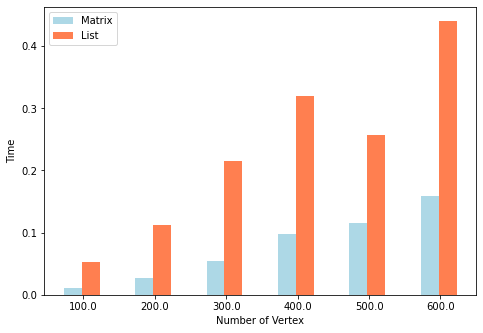

In [112]:
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, den_df["time_dijkstra_1"], color = 'lightblue', width = 0.25)
ax.bar(X + 0.25, den_df["time_dijkstra_2"], color = 'coral', width = 0.25)

ax.legend(labels=['Matrix', 'List'])
ax.set_ylabel('Time')
ax.set_xlabel('Number of Vertex')
ax.set_xticks(X+0.15, den_df["V"])

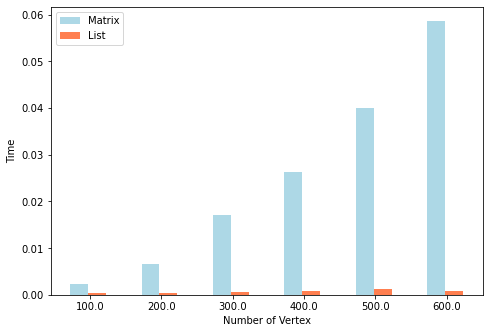

In [114]:
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, sparse_df["time_dijkstra_1"], color = 'lightblue', width = 0.25)
ax.bar(X + 0.25, sparse_df["time_dijkstra_2"], color = 'coral', width = 0.25)

ax.legend(labels=['Matrix', 'List'])
ax.set_ylabel('Time')
ax.set_xlabel('Number of Vertex')
ax.set_xticks(X+0.15, den_df["V"])